In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
Dataset = pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')

In [11]:
Dataset.info

<bound method DataFrame.info of     Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86>

In [13]:
Dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
X = Dataset.iloc[:,:-1].values
Y = Dataset.iloc[:,-1].values

In [8]:
print(X)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]


In [9]:
print(Y)

[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.2, random_state = 0)

In [15]:
print(X_train)

[[3.8]
 [1.9]
 [7.8]
 [6.9]
 [1.1]
 [5.1]
 [7.7]
 [3.3]
 [8.3]
 [9.2]
 [6.1]
 [3.5]
 [2.7]
 [5.5]
 [2.7]
 [8.5]
 [2.5]
 [4.8]
 [8.9]
 [4.5]]


In [16]:
print(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [17]:
print(Y_train)

[35 24 86 76 17 47 85 42 81 88 67 30 25 60 30 75 21 54 95 41]


In [18]:
print(Y_test)

[20 27 69 30 62]


In [21]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [39]:
print(lr.predict([[4]]))

[41.66078596]


In [32]:
Y_pred = lr.predict(X_test)
Y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [34]:
pd.DataFrame(np.c_[X_test,Y_test,Y_pred],columns=["study hours","student marks original","predicted marks"])

,study hours,student marks original,predicted marks
0,1.5,20.0,16.884145
1,3.2,27.0,33.732261
2,7.4,69.0,75.357018
3,2.5,30.0,26.794801
4,5.9,62.0,60.491033


In [38]:
print(lr.coef_)

[9.91065648]


In [37]:
print(lr.intercept_)

2.018160041434662


In [42]:
m=9.91
c=2.018
y = m*4 + c
print(y)

41.658


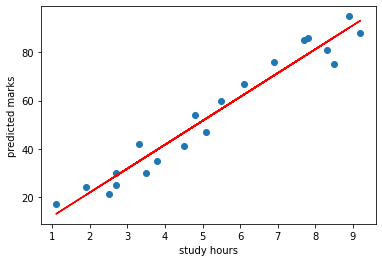

In [60]:
plt.scatter(X_train, Y_train)
plt.plot(X_train, lr.predict(X_train),color='red')
plt.xlabel('study hours')
plt.ylabel('predicted marks')
plt.show()

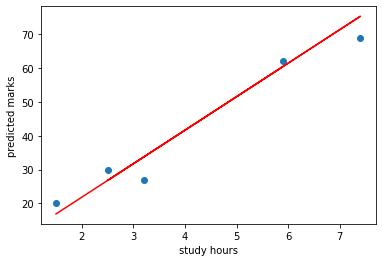

In [56]:
plt.scatter(X_test, Y_test)
plt.plot(X_test, Y_pred,color='red')
plt.xlabel('study hours')
plt.ylabel('predicted marks')
plt.show()

In [72]:
a=lr.score(X_test,Y_test)
print(f'{a*100}%')

94.54906892105353%


In [81]:
import joblib
joblib.dump(lr,'student_marks_predictor.pkl')

['student_marks_predictor.pkl']

In [82]:
model=joblib.load('student_marks_predictor.pkl')

In [84]:
print(model.predict([[6]]))

[61.48209893]
